# M=4,N=4, K=10, 320 dim

In [1]:
%cd /Users/user/Desktop/IWF-DNN/data2DComplex
%pwd
import os
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import print_function
import scipy.io as sio
import time
from keras.layers import Input, Dense
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
%matplotlib inline

/Users/user/Desktop/IWF-DNN/data2DComplex


Using TensorFlow backend.
/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [28]:
DateLocation='MIMO50000_4_4_10.mat'
Data = sio.loadmat(DateLocation)#load data
Xdata=Data['X']
Ydata=Data['Y']
Xdata = np.transpose(Xdata)
Ydata = np.transpose(Ydata)
X = np.column_stack((np.real(Xdata), np.imag(Xdata)))
Y = np.column_stack((np.real(Ydata), np.imag(Ydata)))
x_train, x_val ,y_train, y_val= train_test_split(X, Y, test_size=0.3)

DateLocation='MIMO5000_4_4_10.mat'
DataTest10000 = sio.loadmat(DateLocation)#load data
Xtest=DataTest10000['X']
Xtest = np.transpose(Xtest)
Ytest=DataTest10000['Y']
Ytest = np.transpose(Ytest)
Xtest = np.column_stack((np.real(Xtest), np.imag(Xtest)))
Ytest = np.column_stack((np.real(Ytest), np.imag(Ytest)))

# preprocess dataset 

In [6]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
# Don't cheat - fit only on training data
scaler.fit(x_train)  
x_train_standard = scaler.transform(x_train)  
x_val_standard = scaler.transform(x_val)  
Xtest_standard = scaler.transform(Xtest)  

In [4]:
print (x_train.shape)
print (x_val.shape)

(35000, 320)
(15000, 320)


In [41]:
from keras.layers import Input, Dense
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
# this is the size of our encoded representations
encoding_dim = 100  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(320,))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(320, activation='relu')(encoded)

# #this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()
# #a separate encoder model
encoder = Model(input_img, encoded)


##a separate decoder model
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='Adam', loss='mean_absolute_error')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, 320)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 100)               32100     
_________________________________________________________________
dense_35 (Dense)             (None, 320)               32320     
Total params: 64,420
Trainable params: 64,420
Non-trainable params: 0
_________________________________________________________________


In [42]:
from keras.callbacks import EarlyStopping
history = LossHistory()
early_stopping = EarlyStopping(monitor='mean_absolute_error', patience=2)
autoencoder.fit(x_train_standard, x_train_standard,
                epochs=40,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val_standard, x_val_standard),callbacks=[history])

Train on 35000 samples, validate on 15000 samples
Epoch 1/40
35000/35000 [==============================] - 3s 95us/step - loss: 0.7794 - val_loss: 0.7513
Epoch 2/40
35000/35000 [==============================] - 3s 86us/step - loss: 0.7379 - val_loss: 0.7295
Epoch 3/40
35000/35000 [==============================] - 3s 85us/step - loss: 0.7190 - val_loss: 0.7091
Epoch 4/40
35000/35000 [==============================] - 3s 88us/step - loss: 0.6999 - val_loss: 0.6936
Epoch 5/40
35000/35000 [==============================] - 3s 88us/step - loss: 0.6901 - val_loss: 0.6885
Epoch 6/40
35000/35000 [==============================] - 3s 90us/step - loss: 0.6871 - val_loss: 0.6867
Epoch 7/40
35000/35000 [==============================] - 3s 90us/step - loss: 0.6858 - val_loss: 0.6859
Epoch 8/40
35000/35000 [==============================] - 3s 95us/step - loss: 0.6850 - val_loss: 0.6851
Epoch 9/40
35000/35000 [==============================] - 3s 92us/step - loss: 0.6846 - val_loss: 0.6849
Epoch

Val score: 0.6830327216784159


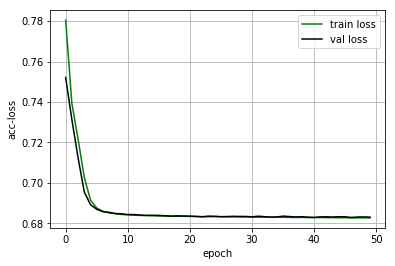

In [24]:
score = autoencoder.evaluate(x_val_standard, x_val_standard, verbose=0)
print('Val score:', score)
# print('Val accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

In [43]:
from keras import regularizers

encoding_dim = 100  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(320,))

# "encoded" is the encoded representation of the input
# x = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
x = Dense(80, activation='relu')(input_img)
encoded = Dense(40, activation='relu')(x)


# x = Dense(40, activation='relu')(encoded)
x = Dense(80, activation='relu')(encoded)
decoded = Dense(320, activation='relu')(x)

# #this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
autoencoder.summary()
# #a separate encoder model
encoder = Model(input_img, encoded)


# ##a separate decoder model
# encoded_input = Input(shape=(encoding_dim,))
# # retrieve the last layer of the autoencoder model
# decoder_layer = autoencoder.layers[-1]
# # create the decoder model
# decoder = Model(encoded_input, decoder_layer(encoded_input))


autoencoder.compile(optimizer='Adam', loss='mean_absolute_error')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 320)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 80)                25680     
_________________________________________________________________
dense_37 (Dense)             (None, 40)                3240      
_________________________________________________________________
dense_38 (Dense)             (None, 80)                3280      
_________________________________________________________________
dense_39 (Dense)             (None, 320)               25920     
Total params: 58,120
Trainable params: 58,120
Non-trainable params: 0
_________________________________________________________________


In [44]:
from keras.callbacks import EarlyStopping
history = LossHistory()
# early_stopping = EarlyStopping(monitor='val_loss', patience=4)
autoencoder.fit(x_train_standard, x_train_standard,
                epochs=50,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val_standard, x_val_standard),callbacks=[history])

Train on 35000 samples, validate on 15000 samples
Epoch 1/50
35000/35000 [==============================] - 4s 101us/step - loss: 0.7925 - val_loss: 0.7859
Epoch 2/50
35000/35000 [==============================] - 3s 95us/step - loss: 0.7814 - val_loss: 0.7793
Epoch 3/50
35000/35000 [==============================] - 3s 94us/step - loss: 0.7766 - val_loss: 0.7771
Epoch 4/50
35000/35000 [==============================] - 3s 95us/step - loss: 0.7746 - val_loss: 0.7763
Epoch 5/50
35000/35000 [==============================] - 3s 96us/step - loss: 0.7732 - val_loss: 0.7753
Epoch 6/50
35000/35000 [==============================] - 3s 95us/step - loss: 0.7722 - val_loss: 0.7745
Epoch 7/50
35000/35000 [==============================] - 3s 98us/step - loss: 0.7711 - val_loss: 0.7729
Epoch 8/50
35000/35000 [==============================] - 3s 98us/step - loss: 0.7696 - val_loss: 0.7709
Epoch 9/50
35000/35000 [==============================] - 4s 101us/step - loss: 0.7673 - val_loss: 0.7677
Epo

Val score: 0.7464945940653483


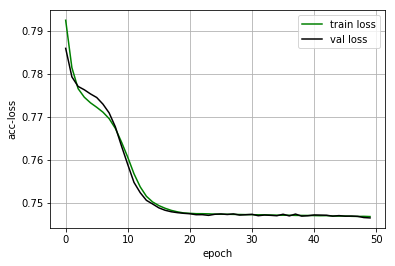

In [45]:
score = autoencoder.evaluate(x_val_standard, x_val_standard, verbose=0)
print('Val score:', score)
# print('Val accuracy:', score[1])

#绘制acc-loss曲线
history.loss_plot('epoch')

In [9]:
encoded_imgs = encoder.predict(x_val_standard)
decoded_imgs = decoder.predict(encoded_imgs)

(15000, 100)

In [6]:
encoded_train = encoder.predict(x_train_standard)

In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier,MLPRegressor
MNK4_4_10Model2=MLPRegressor(activation='relu', learning_rate_init=0.001 ,solver='sgd',max_iter=100
                    ,alpha=1e-5,hidden_layer_sizes=(50,100,100), random_state=1)
MNK4_4_10Model2.fit(encoded_train, y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [7]:
encoded_train.shape

(35000, 100)

In [2]:
trainPred=MNK4_4_10Model2.predict(encoded_train)

encoder_x_val=encoder.predict(x_val_standard)
valPred=MNK4_4_10Model2.predict(encoder_x_val)

encoder_x_test=encoder.predict(Xtest_standard)
ypred=MNK4_4_10Model2.predict(encoder_x_test)
D=160

# test
xtest=DABtoComplex(Xtest,D)
ytest=DABtoComplex(Ytest,D)
ypred=DABtoComplex(ypred,D)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)
M=4
N=4
K=10
# test
nnsumRate=obj_sum_rate(xtest, ypred,M,N,K, 5000)
IWFsumRate=obj_sum_rate(xtest, ytest,M,N,K, 5000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 35000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 35000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 15000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 15000)

plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
plt.subplot(313)
plt.title('CDF Analysis_Val')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(311)
plt.title('Hist AnalysisTest')
histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
plt.subplot(312)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
plt.subplot(313)
plt.title('Hist Analysis_val')
histPlot(nnSRVal,IWFSRVal, ['DNNTrain', 'IWFTrain'])
print('test:')
performance(IWFsumRate, nnsumRate, 5000)
print('Train:')
performance(IWFSRTrain, nnSRTrain, 35000)
print('Val:')
performance(IWFSRVal, nnSRVal, 15000)

NameError: name 'MNK4_4_10Model2' is not defined

In [15]:
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
#         self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
#         self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
#         self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
#         self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
#         self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
#         self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
#         plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
#             plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()

In [50]:
from sklearn.cross_validation import train_test_split
from sklearn.neural_network import MLPClassifier,MLPRegressor
MNK4_4_10Model=MLPRegressor(activation='relu', learning_rate_init=0.001 ,solver='sgd',max_iter=100
                    ,alpha=1e-5,hidden_layer_sizes=(640,480,480), random_state=1)
MNK4_4_10Model.fit(x_train, y_train)

/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(640, 480, 480), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [12]:
from keras.layers import Input, Dense, Dropout,LocallyConnected1D
from keras.callbacks import TensorBoard
from keras.models import Model
import keras
from keras.models import Sequential
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from sklearn.cross_validation import train_test_split
model320 = Sequential()
model320.add(Dense(640, input_dim=320, activation='relu'))
model320.add(Dropout(0.3))
# model320.add(LocallyConnected1D(480, 10, input_shape=(1, 640)))
model320.add(Dense(480, activation='relu'))
model320.add(Dropout(0.3))
model320.add(Dense(480, activation='relu'))
model320.add(Dropout(0.3))
model320.add(Dense(320, activation='linear'))
optimizer=keras.optimizers.Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
model320.summary()
model320.compile(loss='mse', optimizer=optimizer)
hist=model320.fit(x_train_standard, y_train,
                epochs=100,
                batch_size=50,
                shuffle=True,
                validation_data=(x_val_standard, y_val),callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])
# model.fit(x_train, y_train, epochs=100, verbose=0)
dictData['DNN320-5-relu-adam']=hist.history


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 640)               205440    
_________________________________________________________________
dropout_6 (Dropout)          (None, 640)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 480)               307680    
_________________________________________________________________
dropout_7 (Dropout)          (None, 480)               0         
_________________________________________________________________
dense_23 (Dense)             (None, 480)               230880    
_________________________________________________________________
dropout_8 (Dropout)          (None, 480)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 320)               153920    
Total para

35000/35000 [==============================] - 27s 774us/step - loss: 1.4460 - val_loss: 1.4458
Epoch 65/100
35000/35000 [==============================] - 28s 803us/step - loss: 1.4461 - val_loss: 1.4465
Epoch 66/100
35000/35000 [==============================] - 21s 586us/step - loss: 1.4462 - val_loss: 1.4465
Epoch 67/100
35000/35000 [==============================] - 19s 536us/step - loss: 1.4463 - val_loss: 1.4462
Epoch 68/100
35000/35000 [==============================] - 19s 548us/step - loss: 1.4462 - val_loss: 1.4469
Epoch 69/100
35000/35000 [==============================] - 19s 545us/step - loss: 1.4463 - val_loss: 1.4464
Epoch 70/100
35000/35000 [==============================] - 19s 544us/step - loss: 1.4461 - val_loss: 1.4463
Epoch 71/100
35000/35000 [==============================] - 21s 594us/step - loss: 1.4460 - val_loss: 1.4467
Epoch 72/100
35000/35000 [==============================] - 21s 590us/step - loss: 1.4462 - val_loss: 1.4468
Epoch 73/100
35000/35000 [======

NameError: name 'dictData' is not defined

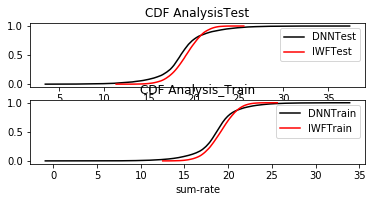

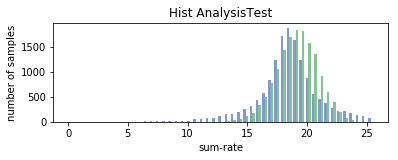

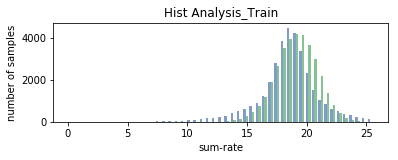

Sum-rate: IWF: 19.110, DNN: 18.619
Ratio: DNN: 97.431%

Sum-rate: IWF: 19.098, DNN: 18.618
Ratio: DNN: 97.487%



0

In [58]:
# M=4 N=4,K=10 and SumPower=50(low)
# NN_y_train_pre_proba=T6_NN.predict_proba(T6_X_train)
trainPred=MNK4_4_10Model.predict(x_train)

# NN_y_test_pre_proba=T6_NN.predict_proba(T6_X_test)
# encoder_x_val=encoder.predict(x_val)
valPred=MNK4_4_10Model.predict(x_val)
D=160
# x=DABtoComplex(X,12)
# xtest=DABtoComplex(Xtest,12)
# ytest=DABtoComplex(Ytest,12)
# ypred=DABtoComplex(ypred,12)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)
M=4
N=4
K=10
# test
# nnsumRate=obj_sum_rate(xtest, ypred,2,2,3, 10000)
# IWFsumRate=obj_sum_rate(xtest, ytest,2,2,3, 10000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 35000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 35000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 15000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 15000)

# print(len(nnsumRate))
# print(len(IWFsumRate))
plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(211)
plt.title('Hist AnalysisTest')
histPlot(nnSRVal,IWFSRVal, ['DNNTest', 'IWFTest'])
plt.subplot(212)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])

performance(IWFSRVal, nnSRVal, 15000)
performance(IWFSRTrain, nnSRTrain, 35000)

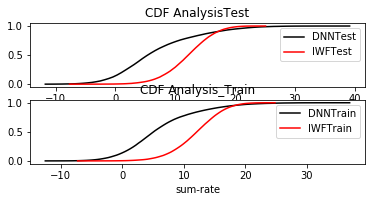

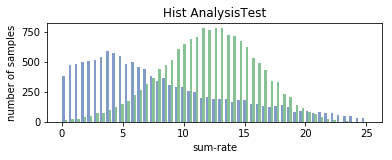

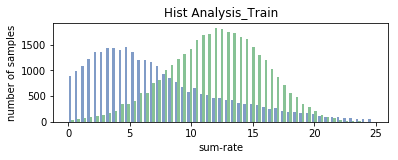

Sum-rate: IWF: 12.038, DNN: 6.679
Ratio: DNN: 55.486%

Sum-rate: IWF: 11.947, DNN: 6.032
Ratio: DNN: 50.492%



0

In [62]:
# M=4 N=4,K=10 and SumPower=50(low)
# NN_y_train_pre_proba=T6_NN.predict_proba(T6_X_train)
trainPred=MNK4_4_10Model.predict(x_train)

# NN_y_test_pre_proba=T6_NN.predict_proba(T6_X_test)
# encoder_x_val=encoder.predict(x_val)
valPred=MNK4_4_10Model.predict(x_val)
D=160
# x=DABtoComplex(X,12)
# xtest=DABtoComplex(Xtest,12)
# ytest=DABtoComplex(Ytest,12)
# ypred=DABtoComplex(ypred,12)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)
M=4
N=4
K=10
# test
# nnsumRate=obj_sum_rate(xtest, ypred,2,2,3, 10000)
# IWFsumRate=obj_sum_rate(xtest, ytest,2,2,3, 10000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 35000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 35000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 15000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 15000)

# print(len(nnsumRate))
# print(len(IWFsumRate))
plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(211)
plt.title('Hist AnalysisTest')
histPlot(nnSRVal,IWFSRVal, ['DNNTest', 'IWFTest'])
plt.subplot(212)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])

performance(IWFSRVal, nnSRVal, 15000)
performance(IWFSRTrain, nnSRTrain, 35000)

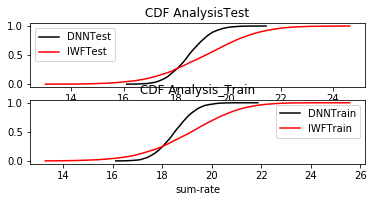

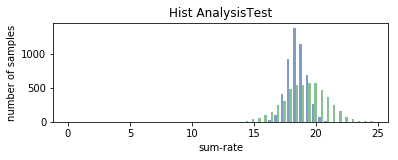

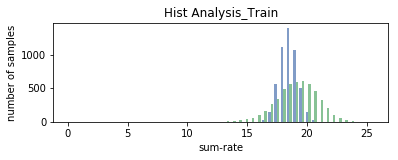

Sum-rate: IWF: 19.092, DNN: 18.504
Ratio: DNN: 96.924%

Sum-rate: IWF: 19.101, DNN: 18.514
Ratio: DNN: 96.928%



0

In [20]:
# M=4 N=4,K=10 and SumPower=50(low)
# NN_y_train_pre_proba=T6_NN.predict_proba(T6_X_train)
trainPred=model320.predict(x_train)

# NN_y_test_pre_proba=T6_NN.predict_proba(T6_X_test)
# encoder_x_val=encoder.predict(x_val)
valPred=model320.predict(x_val)
D=160
# x=DABtoComplex(X,12)
# xtest=DABtoComplex(Xtest,12)
# ytest=DABtoComplex(Ytest,12)
# ypred=DABtoComplex(ypred,12)

# train & val
xtrain=DABtoComplex(x_train,D)
ytrain=DABtoComplex(y_train,D)
trainPred=DABtoComplex(trainPred,D)
xval=DABtoComplex(x_val,D)
yval=DABtoComplex(y_val,D)
valPred=DABtoComplex(valPred,D)
M=4
N=4
K=10
# test
# nnsumRate=obj_sum_rate(xtest, ypred,2,2,3, 10000)
# IWFsumRate=obj_sum_rate(xtest, ytest,2,2,3, 10000)
#trian
nnSRTrain=obj_sum_rate(xtrain, trainPred,M,N,K, 5000)
IWFSRTrain=obj_sum_rate(xtrain, ytrain,M,N,K, 5000)
# validation
IWFSRVal=obj_sum_rate(xval, yval,M,N,K, 5000)
nnSRVal=obj_sum_rate(xval, valPred,M,N,K, 5000)

# print(len(nnsumRate))
# print(len(IWFsumRate))
plt.figure(1)
plt.subplot(311)
plt.title('CDF AnalysisTest')
CDF_Plot(nnSRVal,IWFSRVal, 'DNNTest', 'IWFTest')
plt.subplot(312)
plt.title('CDF Analysis_Train')
CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')

plt.figure(2)
plt.subplot(211)
plt.title('Hist AnalysisTest')
histPlot(nnSRVal,IWFSRVal, ['DNNTest', 'IWFTest'])
plt.subplot(212)
plt.title('Hist Analysis_Train')
histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])

performance(IWFSRVal, nnSRVal, 5000)
performance(IWFSRTrain, nnSRTrain, 5000)

In [60]:
def obj_sum_rate(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    sum_rate=[]
    for i in range(samples):
        rate_nn=0
        H=np.reshape(xtest[i,:],[K,M,N])
        pnn=np.reshape(y_pred[i,:],[K,M,N])      
        for j in range(K):
            if j==0:
                rate_nn = rate_nn+np.real(np.log2( \
                                                  np.linalg.det(np.eye(N)+np.dot(np.dot(H[j,:,:].conj(),np.transpose(pnn[j,:,:])), np.transpose(H[j,:,:])))))
            else:
                pnn[j,:,:]=np.transpose(pnn[j,:,:])+pnn[j-1,:,:]
                rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(N)+np.dot(np.dot(np.transpose(H[j,:,:]), pnn[j,:,:]), np.transpose(H[j,:,:]))) \
                                                  /np.linalg.det((np.eye(N)+np.dot(np.dot(H[j,:,:].conj(),pnn[j-1,:,:]),np.transpose(H[j,:,:]))))))
                
        sum_rate.append(rate_nn)
    return sum_rate

In [61]:
import time
def test(X, model_location, save_name, n_input, n_output, n_hidden_1 = 200, n_hidden_2 = 80, n_hidden_3 = 80, n_hidden_4 = 40,binary=0):
    tf.reset_default_graph()
    x = tf.placeholder("float", [None, n_input])
    is_train = tf.placeholder("bool")
    input_keep_prob = tf.placeholder(tf.float32)
    hidden_keep_prob = tf.placeholder(tf.float32)
    weights, biases = ini_weights4(n_input, n_hidden_1, n_hidden_2, n_hidden_3, n_hidden_4, n_output)
    pred = multilayer_perceptron4(x, weights, biases, input_keep_prob, hidden_keep_prob)
    saver = tf.train.Saver()
    with tf.Session() as sess:
        saver.restore(sess, model_location)
        start_time = time.time()
        y_pred = sess.run(pred, feed_dict={x: X, input_keep_prob: 1, hidden_keep_prob: 1, is_train: False})
        testtime = time.time() - start_time
        # print("testing time: %0.2f s" % testtime)
        if binary==1:
            y_pred[y_pred >= 0.5] = 1
            y_pred[y_pred < 0.5] = 0
        sio.savemat(save_name, {'pred': y_pred})
    return y_pred

def DABtoComplex(XX, dim):
    size=XX.shape[1]
    X=np.empty( (XX.shape[0], dim), dtype= np.complex128 )
    X.real[:,:]=XX[:,0:dim]
    X.imag[:,:]=XX[:,dim:2*dim]
    return X
# def obj_sum_rate(xtest, y_pred,M,N,K, samples):
#     # H ： sampels*12
#     sum_rate=[]
#     for i in range(samples):
#         rate_nn=0
#         H=np.reshape(xtest[i,:],[K,M,N])
#         pnn=np.reshape(y_pred[i,:],[K,M,N])      
#         for j in range(K):
#             if j==0:
#                 rate_nn = rate_nn+np.real(np.log2( \
#                                                   np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),np.transpose(pnn[j,:,:])), H[j,:,:].conj()))))
#             else:
#                 pnn[j,:,:]=np.transpose(pnn[j,:,:])+pnn[j-1,:,:]
#                 rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]), pnn[j,:,:]), H[j,:,:].conj())) \
#                                                   /np.linalg.det((np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),pnn[j-1,:,:]),H[j,:,:].conj())))))
                
#         sum_rate.append(rate_nn)
#     return sum_rate


def CDF_Plot(sumRate1, sumRate2, label1= 'DNN', label2= 'IWF'):
    a = np.array(sumRate1) # your array of numbers
    num_bins1 = np.linspace(0, max(sumRate1), 50)
    counts1, bin_edges1 = np.histogram(a, bins='auto', normed=True)
    cdf1 = np.cumsum(counts1*np.diff(bin_edges1))

    b = np.array(sumRate2) # your array of numbers
    num_bins2 = np.linspace(0, max(sumRate2), 50)
    counts2, bin_edges2 = np.histogram(b, bins='auto', normed=True)
    cdf2 = np.cumsum(counts2*np.diff(bin_edges2))
    
    plt.xlabel('sum-rate')
    plt.plot(bin_edges1[1:], cdf1, color='black', label=label1)
    plt.plot(bin_edges2[1:],cdf2,color='red', label=label2)
    plt.legend()
    return 0

def histPlot(sumRate1,sumRate2, label=['DNN', 'IWF']):
#     plt.figure('%d'%K)
    plt.style.use('seaborn-deep')
    data = np.vstack([sumRate1, sumRate2]).T
    bins = np.linspace(0, max(sumRate2),50)
    plt.hist(data, bins, alpha=0.7, label=label)
#     plt.legend(loc='upper right')
#     plt.xlim([0, 1])
    plt.xlabel('sum-rate')
    plt.ylabel('number of samples')
    #     plt.savefig('Histogram_%d.eps'%K, format='eps', dpi=1000)
    plt.show()
    return 0
def performance(sumRate1,sumRate2, num):
# sumRate1, IWF; sumRate2, NN
    print('Sum-rate: IWF: %0.3f, DNN: %0.3f'%(sum(sumRate1)/num, sum(sumRate2)/num))
    print('Ratio: DNN: %0.3f%%\n' % (sum(sumRate2) / sum(sumRate1)* 100))
    return 0

def testPerformance(model, Xtrain,y_train, Xval,y_val, Xtest,Ytest,dim, M, N, K,samples):
    
    trainPred=model.predict(Xtrain)
    valPred=model.predict(Xval)
    ypred=model.predict(Xtest)
    
    x=DABtoComplex(X,dim)
    xtest=DABtoComplex(Xtest,dim)
    ytest=DABtoComplex(Ytest,dim)
    ypred=DABtoComplex(ypred,dim)

    # train & val
    xtrain=DABtoComplex(x_train,dim)
    ytrain=DABtoComplex(y_train,dim)
    trainPred=DABtoComplex(trainPred,dim)
    xval=DABtoComplex(x_val,dim)
    yval=DABtoComplex(y_val,dim)
    valPred=DABtoComplex(valPred,dim)

    # test
    nnsumRate=obj_sum_rate(xtest, ypred, M, N, K, samples)
    IWFsumRate=obj_sum_rate(xtest, ytest, M, N, K, samples)
    #trian
    nnSRTrain=obj_sum_rate(xtrain, trainPred, M, N, K, samples)
    IWFSRTrain=obj_sum_rate(xtrain, ytrain, M, N, K, samples)
    # validation
    IWFSRVal=obj_sum_rate(xval, yval, M, N, K, samples)
    nnSRVal=obj_sum_rate(xval, valPred, M, N, K, samples)

    plt.figure(1)
    plt.subplot(311)
    plt.title('CDF AnalysisTest')
    CDF_Plot(nnsumRate,IWFsumRate, 'DNNTest', 'IWFTest')
    plt.subplot(312)
    plt.title('CDF Analysis_Train')
    CDF_Plot(nnSRTrain,IWFSRTrain, 'DNNTrain', 'IWFTrain')
    plt.subplot(313)
    plt.title('CDF Analysis_val')
    CDF_Plot(nnSRVal,IWFSRVal, 'DNNVal', 'IWFVal')
    
    plt.figure(2)
    plt.subplot(211)
    plt.title('Hist AnalysisTest')
    histPlot(nnsumRate,IWFsumRate, ['DNNTest', 'IWFTest'])
    plt.subplot(212)
    plt.title('Hist Analysis_Train')
    histPlot(nnSRTrain,IWFSRTrain, ['DNNTrain', 'IWFTrain'])
    
    performance(IWFsumRate, nnsumRate, samples)
    performance(IWFSRTrain, nnSRTrain, samples)
    return 0
    

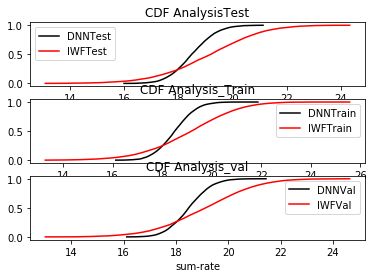

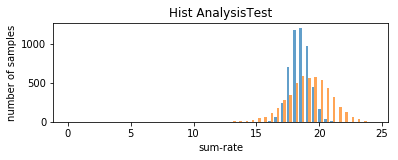

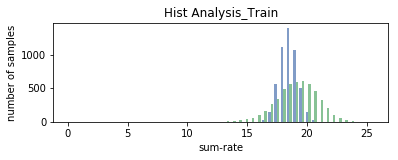

Sum-rate: IWF: 19.112, DNN: 18.511
Ratio: DNN: 96.858%

Sum-rate: IWF: 19.101, DNN: 18.514
Ratio: DNN: 96.928%



0

In [16]:
testPerformance(model320, x_train,y_train, x_val,y_val, Xtest,Ytest,160, 4, 4, 10,5000)

In [24]:
def power(xtest, y_pred,M,N,K, samples):
    # H ： sampels*12
    powerall=[]
    for i in range(samples):
        power=0
        H=np.reshape(xtest[i,:],[K,M,N])
#         print(y_pred[i,:])
        pnn=np.reshape(y_pred[i,:],[K,M,N])  
#         print(pnn)
        for j in range(K):
            power=power+np.trace(np.transpose(pnn[j,:,:]))
        powerall.append(np.real(power))
#             if j==0:
#                 rate_nn = rate_nn+np.real(np.log2( \
#                                                   np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),np.transpose(pnn[j,:,:])), H[j,:,:].conj()))))
#             else:
#                 pnn[j,:,:]=np.transpose(pnn[j,:,:])+pnn[j-1,:,:]
#                 rate_nn = rate_nn+np.real(np.log2(np.linalg.det(np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]), pnn[j,:,:]), H[j,:,:].conj())) \
#                                                   /np.linalg.det((np.eye(M)+np.dot(np.dot(np.transpose(H[j,:,:]),pnn[j-1,:,:]),H[j,:,:].conj())))))
                
#         sum_rate.append(rate_nn)
    return powerall

In [52]:
ttpr=MNK4_4_10Model.predict(x_train)
tpr=DABtoComplex(ttpr,160)
power_nn=power(xtrain,tpr,4,4,10,1000)

In [53]:
ytr=DABtoComplex(Y,160)
power_iwf=power(xtrain,ytr,4,4,10,1000)

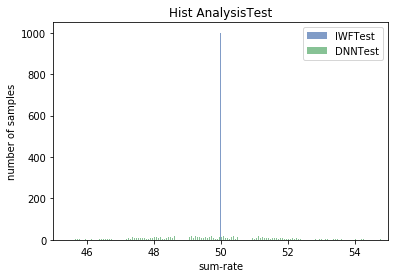

0

In [59]:
def histPlot(sumRate1,sumRate2, label=['DNN', 'IWF']):
#     plt.figure('%d'%K)
#     plt.style.use('seaborn-deep')
    data = np.vstack([sumRate1, sumRate2]).T
    bins = np.linspace(0, max(sumRate2),1000)
    plt.hist(data, bins, alpha=0.7, label=label)
    plt.legend(loc='upper right')
    plt.xlim([45,55])
    plt.xlabel('sum-rate')
    plt.ylabel('number of samples')
    #     plt.savefig('Histogram_%d.eps'%K, format='eps', dpi=1000)
    plt.show()
    return 0
plt.figure(5)
plt.subplot(111)
plt.title('Hist AnalysisTest')
histPlot(power_iwf, power_nn,['IWFTest','DNNTest'])

In [41]:
power_iwf

[50.00000000000006,
 49.999999999999915,
 49.99999999999976,
 49.99999999999978,
 49.9999999999999,
 50.00000000000006,
 49.99999999999996,
 49.999999999999986,
 50.0,
 50.00000000000005,
 50.00000000000007,
 49.99999999999983,
 50.00000000000007,
 49.99999999999993,
 50.000000000000036,
 49.999999999999794,
 49.999999999999915,
 50.000000000000064,
 49.99999999999986,
 49.99999999999969,
 50.00000000000001,
 50.0000000000001,
 50.00000000000017,
 50.00000000000016,
 50.000000000000014,
 50.000000000000085,
 50.00000000000052,
 49.99999999999996,
 49.999999999999766,
 50.00000000000014,
 50.000000000000014,
 50.0000000000003,
 49.99999999999995,
 49.99999999999987,
 50.00000000000007,
 49.99999999999993,
 50.00000000000006,
 50.000000000000014,
 50.00000000000014,
 50.0,
 49.999999999999986,
 50.00000000000004,
 49.99999999999985,
 50.0000000000001,
 49.999999999999915,
 50.000000000000064,
 50.000000000000085,
 50.000000000000206,
 49.99999999999996,
 50.00000000000005,
 50.0000000000

In [55]:
power_nn

[52.56443055199325,
 49.69379394535429,
 47.61981648498455,
 50.06816410072301,
 50.49521743581069,
 55.17451786155935,
 49.23395199215608,
 51.25095910833564,
 54.981410496459404,
 51.28578176697981,
 49.64521572564235,
 48.60346916356616,
 54.90672337009305,
 46.587460575019435,
 50.713356529054245,
 48.66842902751598,
 49.979084277697844,
 50.03335834909585,
 50.577669724626574,
 48.113345290944736,
 54.7427577584403,
 48.82225795640516,
 47.74337144642227,
 49.58366885802131,
 53.025478021606546,
 52.59595516556904,
 49.36409057899892,
 48.878679277804686,
 46.87557912938069,
 45.25934286345998,
 48.01760988839946,
 50.486581264259684,
 49.69932472923981,
 47.60118712723806,
 47.163810184166735,
 50.424936462485405,
 52.551638051210176,
 47.969697365923,
 50.152307613010244,
 48.87422830388285,
 48.32397526354282,
 51.74684444918879,
 50.487770507779345,
 49.65769410297335,
 49.721479792876956,
 51.209741702700185,
 47.120078614496656,
 47.52436514777744,
 51.16539735134706,
 48.81

In [56]:
from pandas import DataFrame
tttpr=DataFrame(tpr)
tttpr.describe()

/Users/user/anaconda2/envs/haha/lib/python3.6/site-packages/numpy/core/_methods.py:32: ComplexWarning: Casting complex values to real discards the imaginary part
  return umr_sum(a, axis, dtype, out, keepdims)


,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
count,(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j),...,(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j),(35000+0j)
mean,(0.08556756326572572+0.0005674299001989349j),(0.007945631043769186-0.004310672959197739j),(0.005840934281050724+0.003097973899601584j),(0.0014076307911742873+0.0049931551933253306j),(0.008912253057969504+0.0036027388443100852j),(0.0790773499894842-0.00020533063569639118j),(-0.0009407962378718843-0.009175956138755076j),(0.0040611594662875615-0.0034844054644794582j),(0.006010984304667298-0.003168831072532862j),(-0.001276796593003528+0.009598036210054851j),...,(-0.04294779059727666+0.06409218358876781j),(-0.008474659510862988+0.05708333167492163j),(0.00803500987682433+0.09460435250848838j),(-0.04310739188834559-0.06370962597767915j),(2.1886375041279806+0.00044695109939738275j),(0.003187788489754908+0.006158702425152042j),(0.006669306827110645-0.03270992337552047j),(-0.00808352557142639-0.05651527011982199j),(0.002759736987397212-0.006581027910252379j),(2.081148543390831+7.980716321799972e-05j)
std,(0.055281778575569734+0j),NaN,NaN,(0.0010830903807977996+0j),(0.0008868836368538784+0j),(0.04993110023778383+0j),NaN,(0.007819424008879182+0j),NaN,NaN,...,NaN,(0.1803746143061048+0j),NaN,NaN,(2.1833681659376465+0j),(0.2097791145481903+0j),(0.2787106866003808+0j),(0.1809273154510526+0j),(0.20926623631813027+0j),(2.156547998235746+0j)
min,(-0.184964459056257-0.04695367368841804j),(-0.15023981811514117-0.10987546256729828j),(-0.12565713238900167-0.02154575687280568j),(-0.17637716154502836+0.05932312497994158j),(-0.15899609760440786-0.05728398207397119j),(-0.16000983809202435+0.021752680632026622j),(-0.16252329030750332+0.013814621504045556j),(-0.19283854601801442-0.01938812232244771j),(-0.14976223741677758-0.009105630618290748j),(-0.16803692904179518+0.02951241123313171j),...,(-6.645311670568849+0.48000585056581846j),(-6.056793211697339+0.14677083242400601j),(-6.009149308541103+1.0977205910708305j),(-6.663209669798379-0.42851813075859124j),(-2.407206859684246+0.03996858462595073j),(-6.119436943489338-0.7501322224372771j),(-5.951640134331361-0.5437695805667294j),(-6.065248792583753-0.1372007568695812j),(-6.097702500094658+0.7246996251573181j),(-1.9291769608931997+0.01607277534332257j)
25%,(0.045147048353271546-0.02453008851601592j),(-0.012444521352483012-0.005074121842816834j),(-0.013559066657095668-0.015447127939482306j),(-0.018052501999745327+0.025940949942190976j),(-0.011317755586253433-0.040161670074202266j),(0.04085112055886571+0.005184084719524256j),(-0.02163423382091861+0.0050084594870986356j),(-0.015042396038709837+0.01652317036212915j),(-0.014586950845754041-0.009009972442817489j),(-0.021723696836593996+0.0006619255855058303j),...,(-0.7203707370102621-0.6162054584571726j),(-0.6333197551556168+1.4911117974791015j),(-0.6685717300985143+0.28859295444601807j),(-0.7207784845085402-0.8160202898602463j),(0.5471397408554541-0.0074052816093616285j),(-0.6462038087517805-0.10597763669335436j),(-0.6415816874010578+1.164580546043965j),(-0.6350469598754132+0.38028305260140904j),(-0.645662591349796-1.0372745192250579j),(0.4502485494351599-0.018957608330630177j)
50%,(0.08500028681253513+0.005885654975115383j),(0.008052373469395413+0.005796468104017211j),(0.005273298511766845+0.005316101547809822j),(0.0015076340807389788+0.0015261810522711992j),(0.00877799158342337+0.020122299282125385j),(0.07781020119153391-0.010169815158442473j),(-0.0015347053720440873+0.02406118660869953j),(0.0048051696696058965+0.017272804750865314j),(0.006130915229985698+0.02391895766273922j),(-0.0012742393020559436-0.016181728277444726j),...,(-0.03241247739233975-0.047633132473972106j),(0.009219383789152553+0.6964193238466447j),(-0.00863330185825217+0.3379124139242112j),(-0.031928368853914486-0.11105739916834459j),(1.6627538063512233-0.018607285998961658j),(0.002485848445525539-0.4